<div style="text-align: center"> <h1> Assignment - 3</div>

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h1>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Examine Labels**

##### **Solution - 1**

In [121]:
import pandas as pd

In [122]:
import numpy as np

In [123]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [124]:
# Looking at the dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.0430,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.0430,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.0430,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.0430,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.0866,1.349914,Green


##### **Solution - 2**

In [125]:
feature_values = df[df['Year'].isin([2022, 2023])].groupby(['Week_Number', 'Year']).agg(
    mean = ('Return', lambda x: round(x.mean()* 100,2)),
    std = ('Return', lambda x: round(x.std()* 100,2)),
    Label = ('Label', 'first'),
).reset_index()

feature_values.head(10)

,Week_Number,Year,mean,std,Label
0,1,2022,-25.22,226.54,Red
1,1,2023,196.30,167.29,Green
2,2,2022,1.86,172.80,Red
3,2,2023,105.88,160.29,Green
4,3,2022,-221.70,234.53,Red
5,3,2023,45.15,221.38,Green
6,4,2022,-7.64,224.39,Green
7,4,2023,173.48,223.54,Green
8,5,2022,-395.16,1262.95,Green
9,5,2023,461.92,1067.40,Green


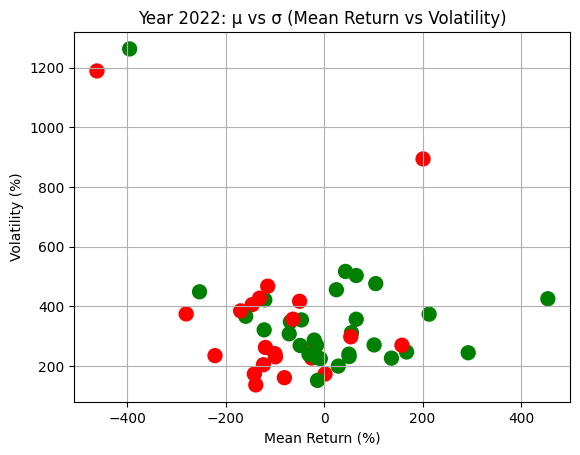

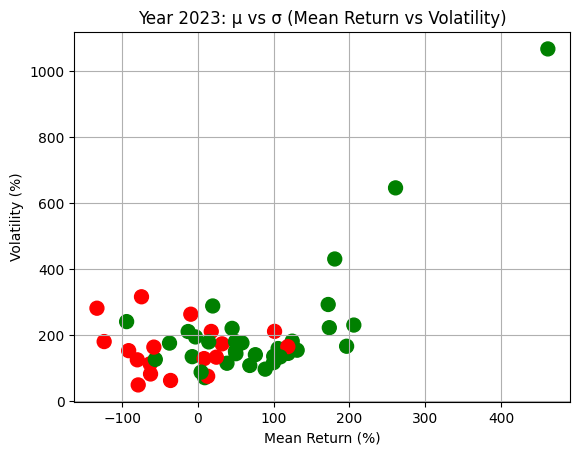

In [126]:
import matplotlib.pyplot as plt

def plot_year_data(data, year):
  # Map labels to colors
    colors = data['Label'].map({'Green': 'green', 'Red': 'red'})
    plt.scatter(data["mean"], data['std'], c=colors, s = 100)
    plt.title(f'Year {year}: µ vs σ (Mean Return vs Volatility)')
    plt.xlabel("Mean Return (%)")
    plt.ylabel("Volatility (%)")
    plt.grid(True)
    plt.show()

plot_year_data(feature_values[feature_values['Year'] == 2022], 2022)
plot_year_data(feature_values[feature_values['Year'] == 2023], 2023)

**💡Interpretation of Scatterplots💡-**

The market for META seems to be much more volatile in 2022 compared to 2023. This could be due to macroeconomic factores such as rising inflation, covid - 19 market uncertanity and interest rate hikes, which led to more signifivant price swings. In 2023, the volatility decreased, posiblity due to stable recovery from covid market. I do see stronger recovery in performance 2023.

The graph is left skewed for 2023, indicating that most of the returns were lower than the mean, with a few weeks of significant negative returns pulling the average down.In contrast, the distribution is more centrally skewed for 2022, suggesting that the returns were more evenly spread arounf mean, with fewer extreame outliers.


### **Part - 2 Trading with labels**

In [127]:
df = df[df['Year'].isin([2022, 2023])].sort_values(by=['Year', 'Week_Number', 'Day'])
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
500,338.299988,341.079987,337.190002,338.540008,337.523773,14537900,0.651,2022-01-03,1,2022,3,Monday,-0.2522,2.265425,Red
499,339.950012,343.089996,331.869995,336.529999,335.519806,15998000,-0.594,2022-01-04,1,2022,4,Tuesday,-0.2522,2.265425,Red
498,333.019989,335.760010,323.839996,324.170013,323.196930,20564500,-3.673,2022-01-05,1,2022,5,Wednesday,-0.2522,2.265425,Red
497,322.820007,339.170013,322.720001,332.459992,331.461975,27962800,2.557,2022-01-06,1,2022,6,Thursday,-0.2522,2.265425,Red
496,332.739990,337.000000,328.880005,331.790008,330.794006,14722000,-0.202,2022-01-07,1,2022,7,Friday,-0.2522,2.265425,Red
495,325.309998,328.339996,315.429993,328.070007,327.085175,24942400,-1.121,2022-01-10,2,2022,10,Monday,0.0186,1.728026,Red
494,326.779999,334.630005,325.279999,334.369995,333.366272,16226800,1.920,2022-01-11,2,2022,11,Tuesday,0.0186,1.728026,Red
493,335.179993,336.369995,330.029999,333.260010,332.259583,14104900,-0.332,2022-01-12,2,2022,12,Wednesday,0.0186,1.728026,Red
492,334.980011,335.630005,325.760010,326.480011,325.499970,14797100,-2.034,2022-01-13,2,2022,13,Thursday,0.0186,1.728026,Red
491,321.790008,332.730011,321.209992,331.899994,330.903686,16868500,1.660,2022-01-14,2,2022,14,Friday,0.0186,1.728026,Red


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
cash = 100  # Starting capital
position = 0
portfolio_value = 100
portfolio_values_2022 = []
portfolio_values_2023 = []
week_ids_2022 = []
week_ids_2023 = []

# Trading strategy implementation
for i, row in df.iterrows():
    price = row['Adj Close']
    label = row['Label']
    year = row['Year']

    if label == 'Green':
        if position == 0:
            position = cash / price
            cash = 0
    elif label == 'Red':
        if position > 0:
            cash = position * price
            position = 0

    # Calculate the current portfolio value
    portfolio_value = cash + (position * price)

    if year == 2022:
        portfolio_values_2022.append(portfolio_value)
        week_ids_2022.append(f"{row['Year']}-{row['Week_Number']}")
    elif year == 2023:
        portfolio_values_2023.append(portfolio_value)
        week_ids_2023.append(f"{row['Year']}-{row['Week_Number']}")

# Combine both years for analysis
portfolio_values = portfolio_values_2022 + portfolio_values_2023
week_ids = week_ids_2022 + week_ids_2023

print(f'Portfolio values over time: {portfolio_values}')

Portfolio values over time: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.2271718618392, 95.43908979410895, 95.44233207534118, 97.73250416114934, 103.33322986551289, 104.62893894676344, 77.0172663630272, 76.80023574066965, 101.47387674318765, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 72.85478684558379, 71.54608053648998, 74.84488318183959, 75.883187605148, 73.36312429734367, 73.36312429734367, 73.36312429734367, 73.36312429734367, 73.36312429734367, 73.36312429734367, 74.46667783549985, 77.67952807722797, 76.39204496539375, 73.41791386931489, 73.03440484251426, 75.14760055282446, 79.68706162733189, 81.33457592446621, 84.71959890100082, 82.76293197296673, 84.78221039036062, 83.53386100488783, 85.9249095872087, 86.80539982532542, 87.99113772143843, 87.49806148302584, 89.9517156277

##### **Solution - 1**

In [130]:
# Calculate the Average and Volatility of Weekly Balances
average_2022 = np.mean(portfolio_values_2022)
volatility_2022 = np.std(portfolio_values_2022)
average_2023 = np.mean(portfolio_values_2023)
volatility_2023 = np.std(portfolio_values_2023)

print(f'Average 2022 portfolio value: ${average_2022:.2f}')
print(f'Volatility 2022: {volatility_2022:.2f}')
print(f'Average 2023 portfolio value: ${average_2023:.2f}')
print(f'Volatility 2023: {volatility_2023:.2f}')

Average 2022 portfolio value: $74.95
Volatility 2022: 11.07
Average 2023 portfolio value: $195.39
Volatility 2023: 51.57


##### **Solution - 2**

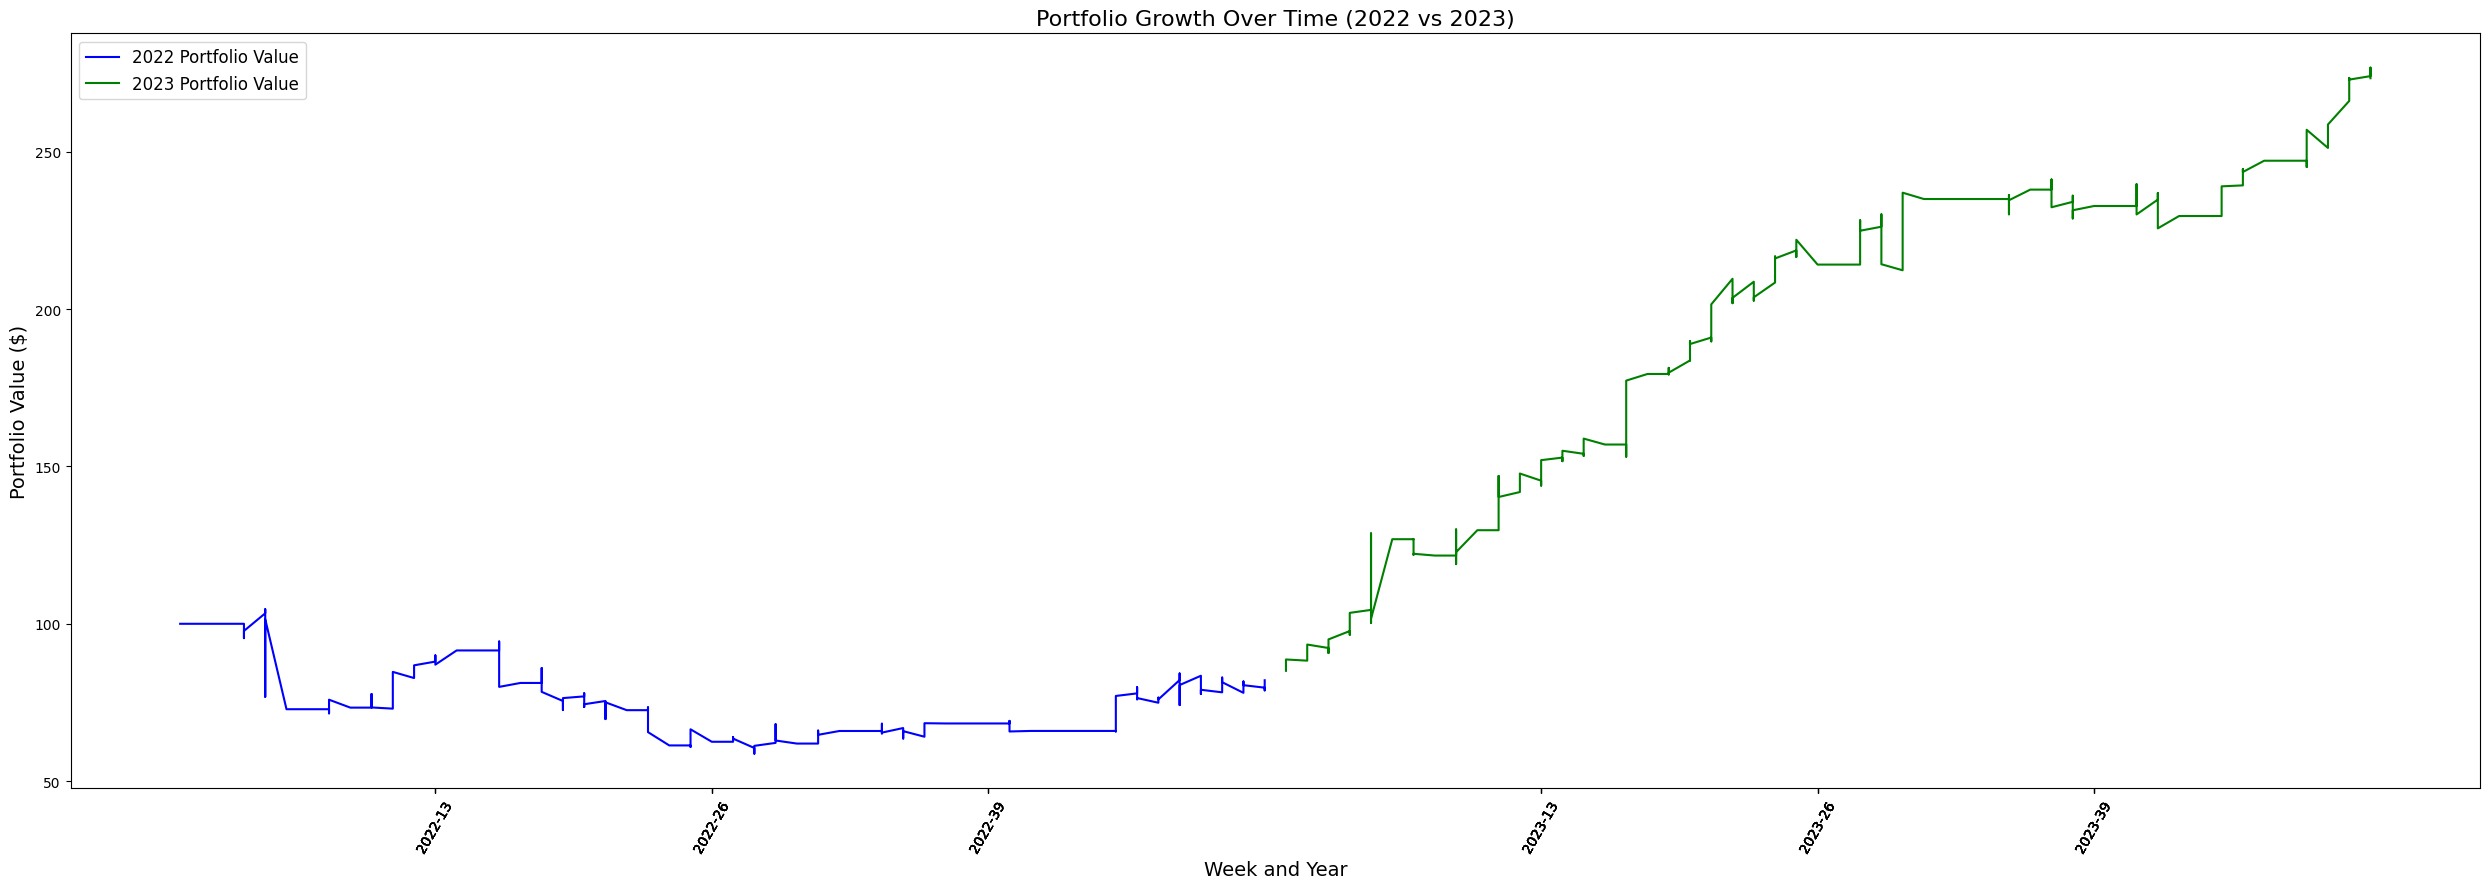

In [131]:
# Plotting portfolio values separately for 2022 and 2023
plt.figure(figsize=(25, 9))

# Plot for 2022
plt.plot(week_ids_2022, portfolio_values_2022, label='2022 Portfolio Value', color='blue')

# Plot for 2023
plt.plot(week_ids_2023, portfolio_values_2023, label='2023 Portfolio Value', color='green')

plt.xlabel('Week and Year', fontsize=14)
plt.ylabel('Portfolio Value ($)', fontsize=14)
plt.title('Portfolio Growth Over Time (2022 vs 2023)', fontsize=16)
plt.xticks(rotation=60)

# Only show labels for the first week of each quarter to reduce clutter
quarter_weeks = [week_id for week_id in week_ids if week_id.endswith('01') or week_id.endswith('13') or week_id.endswith('26') or week_id.endswith('39')]
plt.xticks(ticks=quarter_weeks, labels=quarter_weeks, fontsize=10)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


**💡Interpretation of Results & Graph💡-**

The growth of the portfolio value of META in 2022 is less compared 2023 based on the assigned labels.

##### **Solution - 3**

In [132]:
# Min and Max Portfolio Value
min_value = min(portfolio_values)
max_value = max(portfolio_values)
min_index = portfolio_values.index(min_value)
max_index = portfolio_values.index(max_value)

min_week = week_ids[min_index]
max_week = week_ids[max_index]

print(f'Minimum portfolio value: ${min_value:.2f} (Week: {min_week})')
print(f'Maximum portfolio value: ${max_value:.2f} (Week: {max_week})')

Minimum portfolio value: $58.75 (Week: 2022-28)
Maximum portfolio value: $276.71 (Week: 2023-52)


##### **Solution - 4**

In [133]:
# Final portfolio value after last week
final_portfolio_value = portfolio_value

print(f'Final portfolio value: ${final_portfolio_value:.2f}')

Final portfolio value: $273.34


##### **Solution - 5**

In [134]:
growth_durations = []
decline_durations = []

# Calculate growth and decline durations
growth_durations, decline_durations = [], []
current_growth, current_decline = 0, 0

for i in range(1, len(portfolio_values)):
    if portfolio_values[i] > portfolio_values[i-1]:
        current_growth += 1
        current_decline = 0
    elif portfolio_values[i] < portfolio_values[i-1]:
        current_decline += 1
        current_growth = 0

    growth_durations.append(current_growth)
    decline_durations.append(current_decline)

# Maximum growth and decline durations
max_growth_duration = max(growth_durations)
max_decline_duration = max(decline_durations)

# Print Results
print(f'Maximum growth duration (weeks): {max_growth_duration}')
print(f'Maximum decline duration (weeks): {max_decline_duration}')


Maximum growth duration (weeks): 6
Maximum decline duration (weeks): 4


### **Part - 3 Linear Separability**

##### **Solution - 1 Reduce Dataset, Draw  a line of separation & Compute the equation**

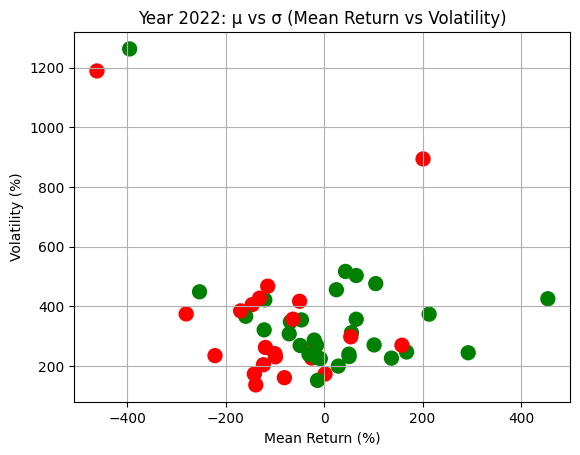

In [135]:
plot_year_data(feature_values[feature_values['Year'] == 2022], 2022)

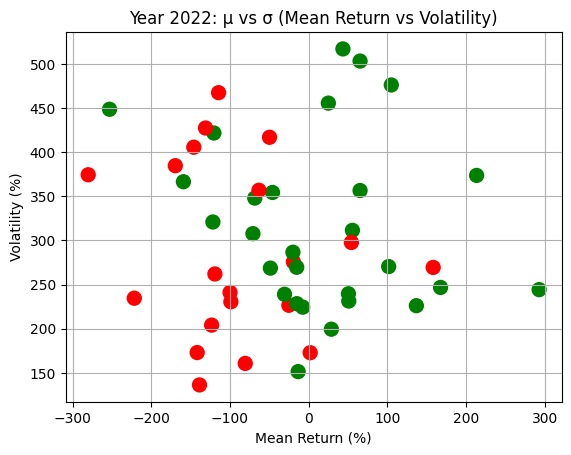

In [136]:
# Remove points with extremely high volatility or far off mean returns
reduced_df = feature_values[(feature_values['std'] < 800) & (feature_values['mean'].between(-400, 400))]

# Plot the reduced data
plot_year_data(reduced_df[reduced_df['Year'] == 2022], 2022)

**💡Interpretation of Result💡-**

Here I cleaned up the dataset by removing the extreame outliers. This helps in reducing noise and focus on a more realistic range of values for analysis.

**Condition 1** : Filters out the dataset where volatility is greater than 800.

**Condition 2:** Fiters out the dataset where mean return lies between -400% and 400%, disregarding points with extreme returns that are too far from normal.

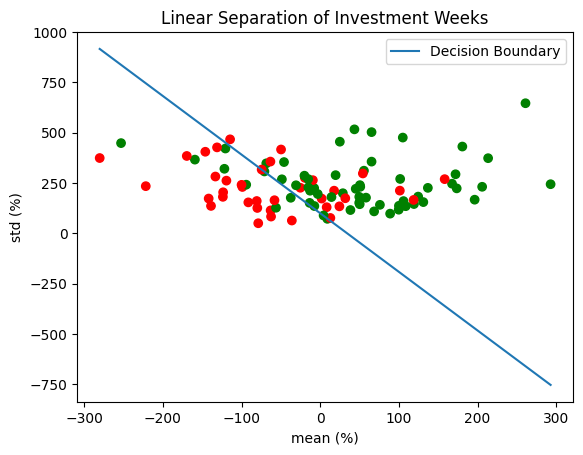

Equation of the line: y = -2.9145513974702357x + [99.89273945]


In [137]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Prepare the data
X = reduced_df[['mean', 'std']].values
y = reduced_df['Label'].apply(lambda x: 1 if x == 'Green' else 0).values

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Coefficients
coef = model.coef_[0]
intercept = model.intercept_

# Plotting the decision boundary
x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(x_values * coef[0] + intercept) / coef[1]

plt.scatter(reduced_df['mean'], reduced_df['std'], c=reduced_df['Label'].apply(lambda x: 'green' if x == 'Green' else 'red'))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('mean (%)')
plt.ylabel('std (%)')
plt.title('Linear Separation of Investment Weeks')
plt.legend()
plt.show()

# Print the equation of the line
print(f"Equation of the line: y = {-coef[0]/coef[1]}x + {-intercept/coef[1]}")


##### **Solution - 2 Assign Labels**

In [138]:
# Use 'mean' and 'std' columns from year_2_data for prediction
X_year_2 = year_2_data[['mean', 'std']].values

# Get predicted probabilities for Year 2 data
y_pred_prob_year_2 = model.predict_proba(X_year_2)[:, 1]

# Apply the custom threshold to classify as 'Green' or 'Red'
custom_threshold = 0.3
year_2_data['Predicted_Label'] = np.where(y_pred_prob_year_2 >= custom_threshold, 'Green', 'Red')

# Check the number of label differences
label_comparison = year_2_data[year_2_data['Label'] != year_2_data['Predicted_Label']]
print(f"Number of label differences after threshold adjustment: {len(label_comparison)}")
# Check the first few predictions
year_2_data.head()



Number of label differences after threshold adjustment: 12


,Week_Number,Year,mean,std,Label,Predicted_Label
1,1,2023,196.30,167.29,Green,Green
3,2,2023,105.88,160.29,Green,Green
5,3,2023,45.15,221.38,Green,Green
7,4,2023,173.48,223.54,Green,Green
9,5,2023,461.92,1067.40,Green,Green


##### **Solution - 3 Implement new trading strategy**

In [139]:
# Initialize variables
cash = 100  # Starting capital
position = 0
portfolio_value = 100
portfolio_values_2023 = []
week_ids_2023 = []

# Trading strategy based on predicted labels for year 2
for i, row in year_2_data.iterrows():
    price = df[(df['Year'] == 2023) & (df['Week_Number'] == row['Week_Number'])]['Adj Close'].values[0]
    predicted_label = row['Predicted_Label']

    if predicted_label == 'Green':
        if position == 0:  # If we are not holding any stock, buy
            position = cash / price
            cash = 0
    elif predicted_label == 'Red':
        if position > 0:  # If we are holding stock, sell
            cash = position * price
            position = 0

    # Calculate the current portfolio value
    portfolio_value = cash + (position * price)
    portfolio_values_2023.append(portfolio_value)
    week_ids_2023.append(f"{row['Year']}-{row['Week_Number']}")

# Final portfolio value after last week of 2023
final_portfolio_value_2023 = portfolio_value

print(f'Final portfolio value for year 2 (2023): ${final_portfolio_value_2023:.2f}')

Final portfolio value for year 2 (2023): $338.88


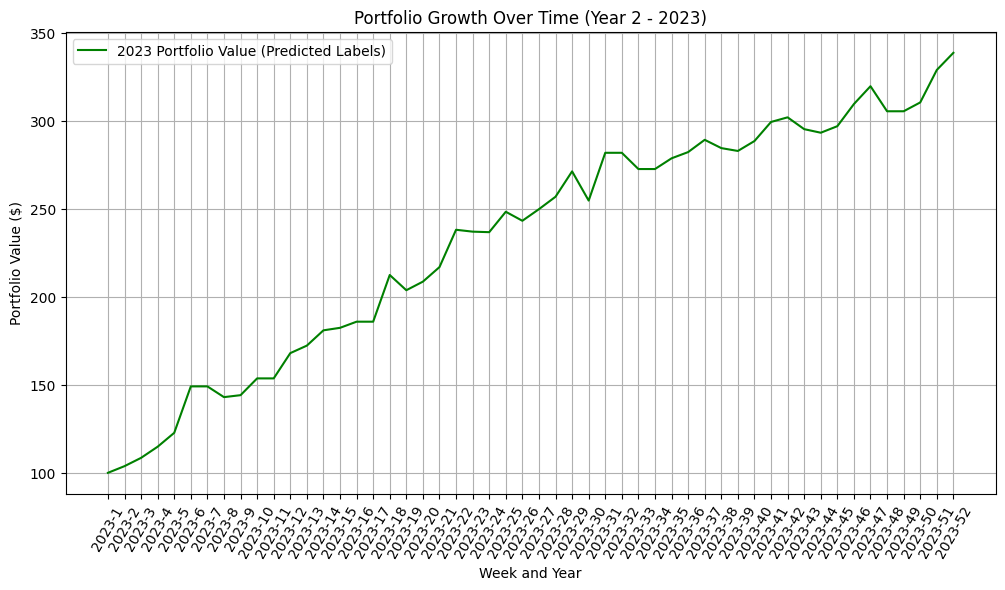

In [140]:
# Plot portfolio value over time for year 2
plt.figure(figsize=(12, 6))
plt.plot(week_ids_2023, portfolio_values_2023, label='2023 Portfolio Value (Predicted Labels)', color='green')
plt.xlabel('Week and Year')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth Over Time (Year 2 - 2023)')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.show()


**💡Interpretation of Results & Graph💡-**

By implementing the new strategy based on the predicted labels, the portfolio values of META saw a significant increase of approximately 23.98%. This suggests that the strategy outperformed the original one.

### **Part - 4 Bernford Law: Nordstrom**

##### **Solution - 1**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
bl = pd.read_csv("nordstrom product data.csv")

<ipython-input-142-fafe7808230e>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  bl = pd.read_csv("nordstrom product data.csv")


In [143]:
bl.head()

,DEPARTMENT,CATEGORY,SUBCATEGORY,SKU,PRODUCT_NAME,BRAND,GENDER,PRICE_RETAIL,PRICE_CURRENT,REVIEW_RATING,REVIEW_COUNT,PROMOTION,COLOR,RunDate,InsertUpdateTime
0,Women,Clothing,"Blazers, Suits & Separates",4578258,Etiennette B Good Wool Suit Jacket,Theory,Women,345.0,345.0,4.1,85,NaN,498,2022-05-15 08:03:21,2022-05-15 08:19:11
1,Women,Clothing,"Blazers, Suits & Separates",4954210,Demitria 2 Stretch Good Wool Suit Pants,Theory,Women,215.0,215.0,4.2,71,NaN,020,2022-05-15 08:03:21,2022-05-15 08:19:11
2,Women,Clothing,"Blazers, Suits & Separates",5125568,Bermuda Shorts,Vince,Women,175.0,175.0,4.0,41,NaN,001,2022-05-15 08:03:21,2022-05-15 08:19:11
3,Women,Clothing,"Blazers, Suits & Separates",5184553,Drape Collar Knit Blazer,Caslon®,Women,69.0,69.0,4.3,590,NaN,401,2022-05-15 08:03:21,2022-05-15 08:19:11
4,Women,Clothing,"Blazers, Suits & Separates",5268077,Grace Jacket,NIC+ZOE,Women,148.0,148.0,3.9,51,NaN,004,2022-05-15 08:03:21,2022-05-15 08:19:11


In [144]:
bl.isna().sum()

,0
DEPARTMENT,0
CATEGORY,0
SUBCATEGORY,0
SKU,0
PRODUCT_NAME,17
BRAND,114
GENDER,0
PRICE_RETAIL,0
PRICE_CURRENT,0
REVIEW_RATING,0


##### **Solution - 2**

In [145]:
num_categories = bl['CATEGORY'].nunique()
print(f"Number of unique categories: {num_categories}")
for category in bl['CATEGORY'].unique():
    print(f"Category: {category}")

Number of unique categories: 7
Category: Clothing
Category: Shoes
Category: Handbags
Category: Jewelry
Category: Accessories
Category: Maternity
Category: New Arrivals


##### **Solution - 3**

In [146]:
subcategory = bl.groupby('CATEGORY')['SUBCATEGORY'].nunique()
print(subcategory)

CATEGORY
Accessories     12
Clothing        17
Handbags        15
Jewelry         12
Maternity       11
New Arrivals     6
Shoes           16
Name: SUBCATEGORY, dtype: int64


In [147]:
print(f'Category with most sub categories: {subcategory.idxmax()}: {subcategory.max()}')
print(f'Subcategories: {bl[bl["CATEGORY"] == subcategory.idxmax()]["SUBCATEGORY"].unique()}')

Category with most sub categories: Clothing: 17
Subcategories: ['Blazers, Suits & Separates' 'Activewear' 'Bodysuits'
 'Lingerie, Hosiery & Shapewear' 'Coats & Jackets' 'Jeans & Denim'
 'Shorts' 'Loungewear' 'Jumpsuits & Rompers' 'Pants & Leggings' 'Skirts'
 'Sweaters' 'Sweatshirts & Hoodies' 'Sleepwear & Robes'
 'Swimsuits & Cover-Ups' 'Dresses' 'Tops']


In [148]:
print(f'Categories with fewest sub categories: {subcategory.idxmin()}: {subcategory.min()}')
print(f'Subcategories: {bl[bl["CATEGORY"] == subcategory.idxmin()]["SUBCATEGORY"].unique()}')

Categories with fewest sub categories: New Arrivals: 6
Subcategories: ['Shoes' 'Accessories' 'Handbags & Wallets' 'Beauty' 'Clothing' 'Jewelry']


##### **Solution - 4**

In [149]:
import pandas as pd
bl['PRICE_RETAIL'] = pd.to_numeric(bl['PRICE_RETAIL'], errors='coerce')
price_stats = bl.groupby('CATEGORY')['PRICE_RETAIL'].agg(['mean', 'median'])
price_stats.columns = ['Average Price', 'Median Price']
price_stats

,Average Price,Median Price
CATEGORY,,
Accessories,661.102010,198.0
Clothing,215.042551,89.0
Handbags,1017.721767,698.0
Jewelry,1003.327448,325.0
Maternity,82.381425,68.0
New Arrivals,258.012151,89.0
Shoes,185.105339,130.0


##### **Solution - 5**

In [150]:
bl['LEADING_DIGIT'] = bl['PRICE_RETAIL'].astype(str).str[0].astype(int)
leading_digit_counts = bl[['LEADING_DIGIT']].value_counts().sort_index()
leading_digit_counts

,count
LEADING_DIGIT,
1,96256
2,37795
3,27783
4,25881
5,21727
6,20356
7,18206
8,17624
9,22781


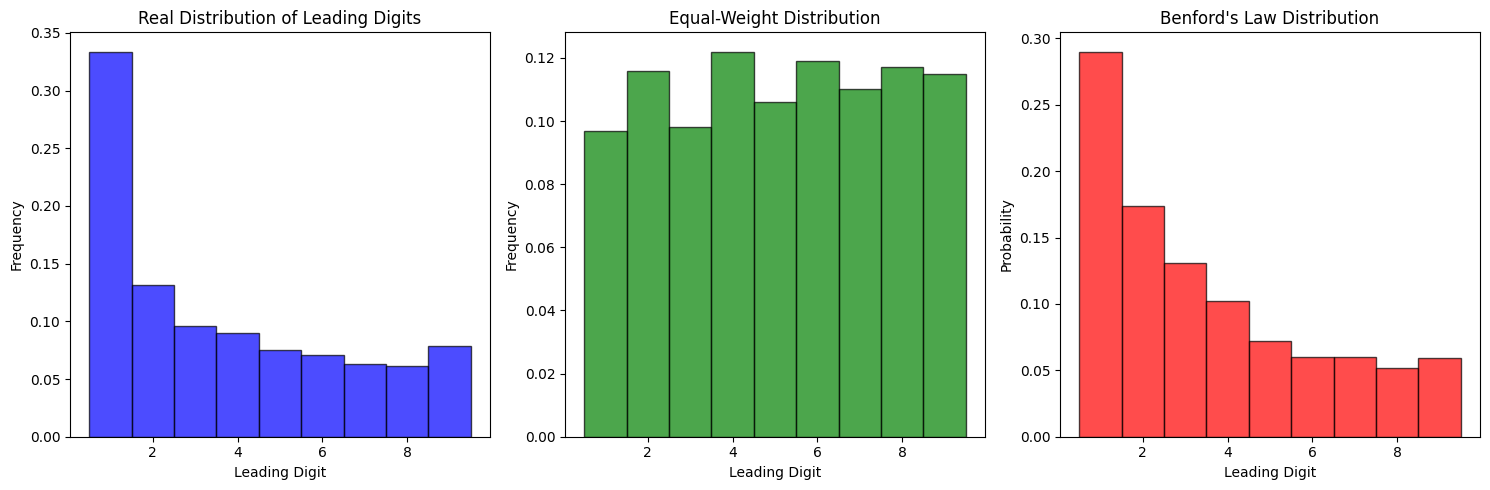

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate Equal Weight Distribution
equal_distribution = np.random.choice(range(1, 10), size=1000, p=[1/9]*9)

# Simulate Benford Distribution
benford_probabilities = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]
benford_distribution = np.random.choice(range(1, 10), size=1000, p=benford_probabilities)

# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for real distribution
plt.subplot(1, 3, 1)
plt.hist(bl['LEADING_DIGIT'], bins=np.arange(1, 11) - 0.5, density=True, edgecolor = 'black', color='blue', alpha=0.7)
plt.title('Real Distribution of Leading Digits')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')

# Histogram for equal-weight distribution
plt.subplot(1, 3, 2)
plt.hist(equal_distribution, bins=np.arange(1, 11) - 0.5, density=True, edgecolor = 'black', color='green', alpha=0.7)
plt.title('Equal-Weight Distribution')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')

# Histogram for Benford's Law
plt.subplot(1, 3, 3)
plt.hist(benford_distribution, bins=np.arange(1, 11) - 0.5, density=True, edgecolor = 'black', color='red', alpha=0.7)
plt.title("Benford's Law Distribution")
plt.xlabel('Leading Digit')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


**💡Interpretation of Result💡-**

The real distribution closely follows the trend predicted by Benford's Law. The frequency decreases as the leading digits increases.

The Equal-Weight Distribution assumes that each digit from 1 to 9 as the leading digit is equally likely, with a probability of 11.11%.

Benford's Law distribution predicts a logarithmic decrease in the frequency of leading digits, where lower digits are more common.

##### **Solution - 6**

In [152]:
equal_weight_freq = np.full(9, 1/9)
benford_freq = np.array([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046])

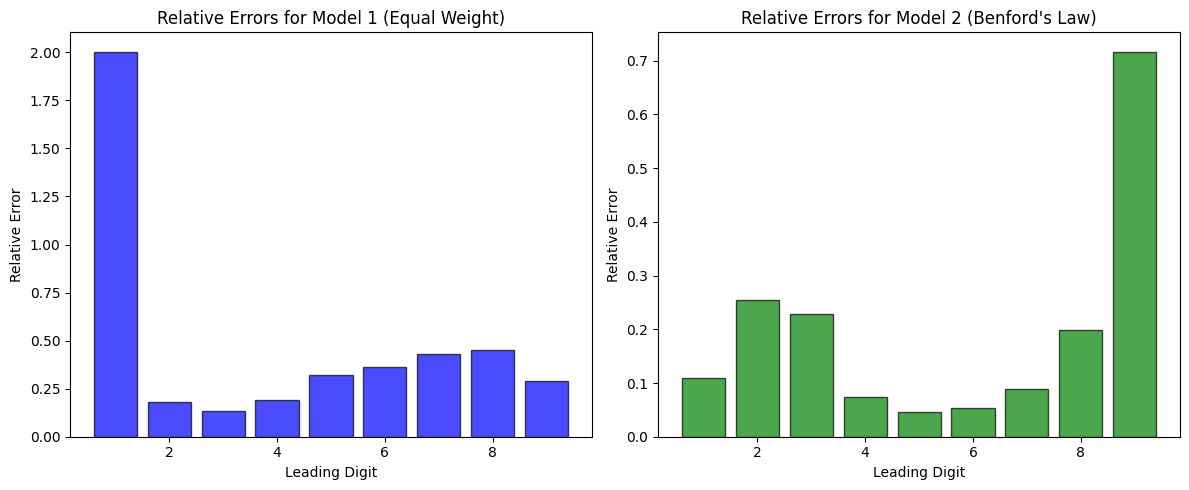

In [153]:
# Calculate observed frequency distribution
observed_freq = bl['LEADING_DIGIT'].value_counts(normalize=True).sort_index().values

# Calculate relative errors
relative_error_equal_weight = np.abs(observed_freq - equal_weight_freq) / equal_weight_freq
relative_error_benford = np.abs(observed_freq - benford_freq) / benford_freq

# Plot histograms for relative errors
plt.figure(figsize=(12, 5))

# Model 1 (Equal Weight)
plt.subplot(1, 2, 1)
plt.bar(range(1, 10), relative_error_equal_weight, color='blue', edgecolor='black', alpha=0.7)
plt.title('Relative Errors for Model 1 (Equal Weight)')
plt.xlabel('Leading Digit')
plt.ylabel('Relative Error')

# Model 2 (Benford's Law)
plt.subplot(1, 2, 2)
plt.bar(range(1, 10), relative_error_benford, color='green', edgecolor='black', alpha=0.7)
plt.title('Relative Errors for Model 2 (Benford\'s Law)')
plt.xlabel('Leading Digit')
plt.ylabel('Relative Error')

plt.tight_layout()
plt.show()


##### **Solution - 7**

In [154]:
from sklearn.metrics import mean_squared_error

# RMSE for Equal Weight
rmse_model1 = np.sqrt(mean_squared_error(observed_freq, equal_weight_freq))

# RMSE for Benford's Law
rmse_model2 = np.sqrt(mean_squared_error(observed_freq, benford_freq))

print(f'RMSE for Equal Weight: {rmse_model1}')
print(f'RMSE for Benford\'s Law: {rmse_model2}')

# Determine which model is closer
if rmse_model1 < rmse_model2:
    print("Model 1 is closer to the real distribution.")
else:
    print("Model 2 is closer to the real distribution.")


RMSE for Equal Weight: 0.08123870719088272
RMSE for Benford's Law: 0.02406197164811337
Model 2 is closer to the real distribution.


##### **Solution - 8 a)**

In [155]:
# Extract relevant categories
categories = ['Accessories', 'Clothing', 'Handbags']
data = bl[bl['CATEGORY'].isin(categories)]

# Function to calculate leading digit distribution
def leading_digit_freq(prices):
    leading_digits = prices.astype(str).str[0].astype(int)  # Extract leading digit
    freq = leading_digits.value_counts(normalize=True).sort_index().reindex(range(1, 10), fill_value=0).values
    return freq

# Initialize a dictionary to store RMSE results
rmse_results = {}

# Iterate over the selected categories
for category in categories:
    category_data = data[data['CATEGORY'] == category]

    # Extract the "Price Retail" column and compute leading digit frequencies (F)
    price_data = category_data['PRICE_RETAIL'].dropna()
    observed_freq = leading_digit_freq(price_data)

    # Compute RMSE for Model 1 (Equal Weight)
    rmse_equal_weight = np.sqrt(mean_squared_error(observed_freq, equal_weight_freq))

    # Compute RMSE for Model 2 (Benford's Law)
    rmse_benford = np.sqrt(mean_squared_error(observed_freq, benford_freq))

    # Store the RMSE results
    rmse_results[category] = {
        'RMSE Equal Weight': rmse_equal_weight,
        'RMSE Benford': rmse_benford,
        'Observed Frequencies': observed_freq
    }

print("RMSE Results for Each Category:\n")
for category, results in rmse_results.items():
    print(f"Category: {category}")
    print(f"Observed Frequencies: {results['Observed Frequencies']}")
    print(f"RMSE for Equal Weight: {results['RMSE Equal Weight']}")
    print(f"RMSE for Benford's Law: {results['RMSE Benford']}\n")

RMSE Results for Each Category:

Category: Accessories
Observed Frequencies: [0.26444184 0.19571763 0.13098026 0.1260455  0.07672577 0.06306457
 0.05093677 0.03997993 0.05210773]
RMSE for Equal Weight: 0.07221819813942731
RMSE for Benford's Law: 0.017745058190089195

Category: Clothing
Observed Frequencies: [0.2182831  0.12906097 0.12919863 0.11327594 0.10714548 0.10122609
 0.0781359  0.05980874 0.06386513]
RMSE for Equal Weight: 0.044975052917336944
RMSE for Benford's Law: 0.03665711513145525

Category: Handbags
Observed Frequencies: [0.34315837 0.19000113 0.11007822 0.07946945 0.06813286 0.06053735
 0.05362204 0.03933794 0.05566262]
RMSE for Equal Weight: 0.09250079826876277
RMSE for Benford's Law: 0.01798683654775628



##### **Solution - 8 b)**

In [156]:
print("Closest Categories to Equal Weight and Benford's Law:\n")

# Find the category closest to Equal Weight
closest_to_equal_weight = min(rmse_results, key=lambda x: rmse_results[x]['RMSE Equal Weight'])
print(f"Category closest to Equal Weight model: {closest_to_equal_weight} (RMSE = {rmse_results[closest_to_equal_weight]['RMSE Equal Weight']})")

# Find the category closest to Benford's Law
closest_to_benford = min(rmse_results, key=lambda x: rmse_results[x]['RMSE Benford'])
print(f"Category closest to Benford's Law model: {closest_to_benford} (RMSE = {rmse_results[closest_to_benford]['RMSE Benford']})")

Closest Categories to Equal Weight and Benford's Law:

Category closest to Equal Weight model: Clothing (RMSE = 0.044975052917336944)
Category closest to Benford's Law model: Accessories (RMSE = 0.017745058190089195)


##### **Solution - 9**

 **💡Interpretation of Result💡-**

The stronger fit for Benford's Law in Accessories and Handbags could indicate that consumer tend to gravitate towards lower-priced items for these categories. The stronger fit for Equal Weight model for Clothing could imply that customer preferences in this category are more evenly distributed across the price range.

Brands might consider these insights and focus more on lowering the priced items for Accessories and Handbags while Clothing might support a broader range of pricing strategies.